### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

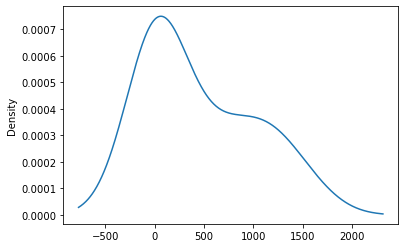

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_counts[app_counts < 10000].plot.density()

In [6]:
# Determine which values to replace if counts are less than 500?
replace_application = list(app_counts[app_counts< 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C1248        1
C1900        1
C8210        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

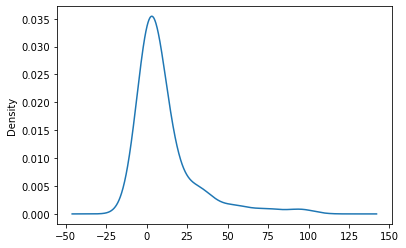

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts[class_counts<100].plot.density()

In [9]:
# Determine which values to replace if counts are less than 100?
replace_class = list(class_counts[class_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat].values))
    

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
app_one_hot_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat)

In [13]:
# Split our preprocessed data into our features and target arrays
import numpy as np
X = app_one_hot_df.drop(columns=["IS_SUCCESSFUL"])
y = app_one_hot_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = np.asarray(X_scaler.transform(X_train))
X_test_scaled = np.asarray(X_scaler.transform(X_test))

In [15]:
len(X_train.columns)

49

### Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
inputs = len(X_train.columns)
h1_nodes = 8
h2_nodes = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_nodes, input_dim = inputs, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h2_nodes, activation="relu")
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 400       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)


In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, verbose=2, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25724/25724 - 2s - loss: 0.6273 - accuracy: 0.6643
Epoch 2/100
25724/25724 - 1s - loss: 0.5766 - accuracy: 0.6946
Epoch 3/100
25724/25724 - 1s - loss: 0.5639 - accuracy: 0.7069
Epoch 4/100
25724/25724 - 1s - loss: 0.5605 - accuracy: 0.7156
Epoch 5/100

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 - 1s - loss: 0.5588 - accuracy: 0.7229
Epoch 6/100
25724/25724 - 1s - loss: 0.5550 - accuracy: 0.7233
Epoch 7/100
25724/25724 - 1s - loss: 0.5536 - accuracy: 0.7247
Epoch 8/100
25724/25724 - 1s - loss: 0.5530 - accuracy: 0.7250
Epoch 9/100
25724/25724 - 1s - loss: 0.5528 - accuracy: 0.7243
Epoch 10/100

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25724/25724 - 1s - loss: 0.5519 - accuracy: 0.7242
Epoch 11/100
25724/25724 - 1s - loss: 0.5517 - accuracy: 0.7241
Epoch 12/100
25724/25724 - 1s - loss: 0.5514 - accuracy: 0.7254
Epoch 13/100
25724/25724 - 1s - loss: 0.5512 - accuracy: 0.7260
Epoch 14/100
25724/25724 - 1s - loss: 

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5655 - accuracy: 0.7298
Loss: 0.5561398352478405, Accuracy: 0.7297959327697754


In [21]:
# More neurons, more layers, different activation function

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
inputs = len(X_train.columns)
h1_nodes = 20
h2_nodes = 20
h3_nodes = 10
h4_nodes = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_nodes, input_dim = inputs, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h2_nodes, activation="relu")
)

# Third_layer
nn.add(
    tf.keras.layers.Dense(units=h3_nodes, activation="relu")
)

# Fourth layer
nn.add(
    tf.keras.layers.Dense(units=h4_nodes, activation="relu")
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                1000      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, verbose=2, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25724/25724 - 2s - loss: 0.5841 - accuracy: 0.7110
Epoch 2/100
25724/25724 - 1s - loss: 0.5553 - accuracy: 0.7297
Epoch 3/100
25724/25724 - 1s - loss: 0.5510 - accuracy: 0.7299
Epoch 4/100
25724/25724 - 1s - loss: 0.5484 - accuracy: 0.7328
Epoch 5/100

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 - 2s - loss: 0.5471 - accuracy: 0.7327
Epoch 6/100
25724/25724 - 1s - loss: 0.5460 - accuracy: 0.7336
Epoch 7/100
25724/25724 - 1s - loss: 0.5457 - accuracy: 0.7336
Epoch 8/100
25724/25724 - 1s - loss: 0.5445 - accuracy: 0.7329
Epoch 9/100
25724/25724 - 1s - loss: 0.5437 - accuracy: 0.7334
Epoch 10/100

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25724/25724 - 1s - loss: 0.5434 - accuracy: 0.7350
Epoch 11/100
25724/25724 - 1s - loss: 0.5428 - accuracy: 0.7346
Epoch 12/100
25724/25724 - 1s - loss: 0.5424 - accuracy: 0.7338
Epoch 13/100
25724/25724 - 1s - loss: 0.5418 - accuracy: 0.7349
Epoch 14/100
25724/25724 - 1s - loss: 

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
inputs = len(X_train.columns)
h1_nodes = 40
h2_nodes = 20
h3_nodes = 20
h4_nodes = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_nodes, input_dim = inputs, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h2_nodes, activation="relu")
)

# Third_layer
nn.add(
    tf.keras.layers.Dense(units=h3_nodes, activation="relu")
)

# Fourth layer
nn.add(
    tf.keras.layers.Dense(units=h4_nodes, activation="relu")
)

# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation="sigmoid")
)

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 40)                2000      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 3,461
Trainable params: 3,461
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200, verbose=2, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/200
25724/25724 - 2s - loss: 0.5804 - accuracy: 0.7128
Epoch 2/200
25724/25724 - 1s - loss: 0.5543 - accuracy: 0.7271
Epoch 3/200
25724/25724 - 1s - loss: 0.5500 - accuracy: 0.7301
Epoch 4/200
25724/25724 - 1s - loss: 0.5482 - accuracy: 0.7317
Epoch 5/200

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 - 1s - loss: 0.5463 - accuracy: 0.7330
Epoch 6/200
25724/25724 - 1s - loss: 0.5456 - accuracy: 0.7318
Epoch 7/200
25724/25724 - 1s - loss: 0.5450 - accuracy: 0.7334
Epoch 8/200
25724/25724 - 1s - loss: 0.5438 - accuracy: 0.7334
Epoch 9/200
25724/25724 - 1s - loss: 0.5440 - accuracy: 0.7342
Epoch 10/200

Epoch 00010: saving model to checkpoints/weights.10.hdf5
25724/25724 - 1s - loss: 0.5429 - accuracy: 0.7342
Epoch 11/200
25724/25724 - 1s - loss: 0.5424 - accuracy: 0.7333
Epoch 12/200
25724/25724 - 1s - loss: 0.5419 - accuracy: 0.7345
Epoch 13/200
25724/25724 - 1s - loss: 0.5417 - accuracy: 0.7346
Epoch 14/200
25724/25724 - 1s - loss: 

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5531 - accuracy: 0.7304
Loss: 0.5619575217722457, Accuracy: 0.7303789854049683
